In [3]:
import os
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter, median_filter, sobel
from copy import copy
import numpy as np
import mediapipe as mp

In [4]:
SEQUENCE_LENGTH = 25
IMAGE_SIZE = (400, 400)
BG_COLOR = (255, 255, 255)
CHOSEN_VIDEO = "316602501_5835131283175606_7260672321814878160_n.mp4"
CHOSEN_VIDEO_2 = "317302684_5844404648931210_2279192474729520794_n.mp4"
PATH_TO_FOLDER_WITH_VIDEOS = "C:/Users/Piotr/Downloads/archive/sign_language_videos"

In [24]:
def get_frames(video_path, video_name, seq_length, grayscale=True):

    mp_drawing = mp.solutions.drawing_utils
    mp_selfie_segmentation = mp.solutions.selfie_segmentation

    capture = cv2.VideoCapture(os.path.join(video_path, video_name).replace("\\", "/"))
    video_length = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

    step = max(round(video_length / seq_length, 0), 1)

    video_frames = []
    success, frame = capture.read()
    frame_nr = 1
    counter = 1

    while success:
        success, frame = capture.read()

        if success and counter % step == 0: 
                
            video_frames.append(frame)
            frame_nr += 1

        counter += 1

    grayscale_frames = []

    for frame_index, frame in enumerate(video_frames, start=1):

        with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:

            image = cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            results = selfie_segmentation.process(image)
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1

            background = np.zeros(image.shape, dtype=np.uint8)
            background[:] = BG_COLOR
            
            output_image = cv2.flip(np.where(condition, image, background), 1)
            
        resized_frame = cv2.resize(output_image, IMAGE_SIZE)
        
        if grayscale:
            resized_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

        grayscale_frames.append(resized_frame)
    
    return grayscale_frames

In [25]:
grayscale_frames = get_frames(PATH_TO_FOLDER_WITH_VIDEOS, CHOSEN_VIDEO, SEQUENCE_LENGTH)

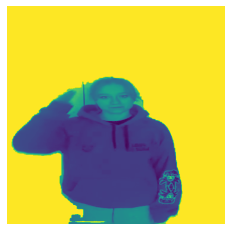

In [26]:
plt.axis('off')
plt.imshow(grayscale_frames[8])
plt.show()

### **Gaussian filter**

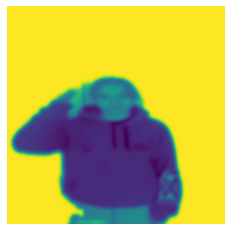

In [27]:
plt.axis('off')
plt.imshow(gaussian_filter(grayscale_frames[8], sigma=3))
plt.show()

### **Median filter**

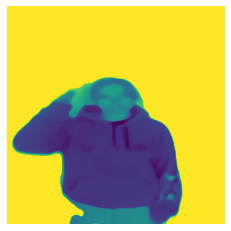

In [28]:
plt.axis('off')
plt.imshow(median_filter(grayscale_frames[8], size=10))
plt.show()

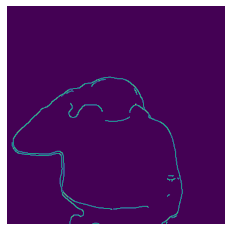

In [39]:
edges = cv2.Canny(median_filter(grayscale_frames[8], size=10), 150, 200)
plt.axis('off')
plt.imshow(edges)
plt.show()

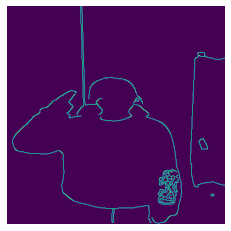

In [22]:
edges = cv2.Canny(gaussian_filter(grayscale_frames[8], 1), 50, 200)
plt.axis('off')
plt.imshow(edges)
plt.show()

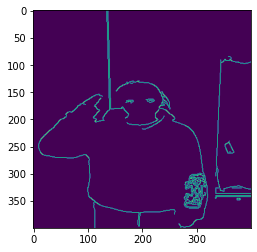

In [12]:
edges = cv2.Canny(grayscale_frames[8], 100, 200)
plt.imshow(edges)

In [13]:
grayscale_frames_2 = get_frames(PATH_TO_FOLDER_WITH_VIDEOS, CHOSEN_VIDEO_2, SEQUENCE_LENGTH)

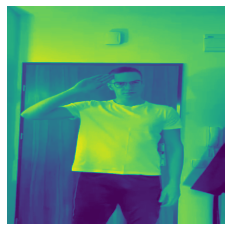

In [14]:
plt.axis('off')
plt.imshow(grayscale_frames_2[8])
plt.show()

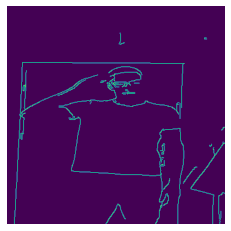

In [15]:
edges_2 = cv2.Canny(grayscale_frames_2[8], 100, 200)

plt.axis('off')
plt.imshow(edges_2)
plt.show()

In [45]:
def get_canny_video(grayscale_frames, apply_median_filter=False, filter_power=8):

    fig, ax = plt.subplots(6, 4, figsize=(30, 50))
    i = 0

    for index, frame in enumerate(grayscale_frames[:-1]):
    # image = copy(grayscale_frames_2[8])
    # # after_gauss = gaussian_filter(image, 3)
    # after_median_filter = median_filter(image, 10)
        if apply_median_filter:
            frame = median_filter(frame, filter_power)
            
        edges = cv2.Canny(frame, 100, 200)
        ax[i, index % 4].imshow(edges)
        ax[i, index % 4].axis('off')

        if index % 4 == 3:
            i += 1

    plt.show()

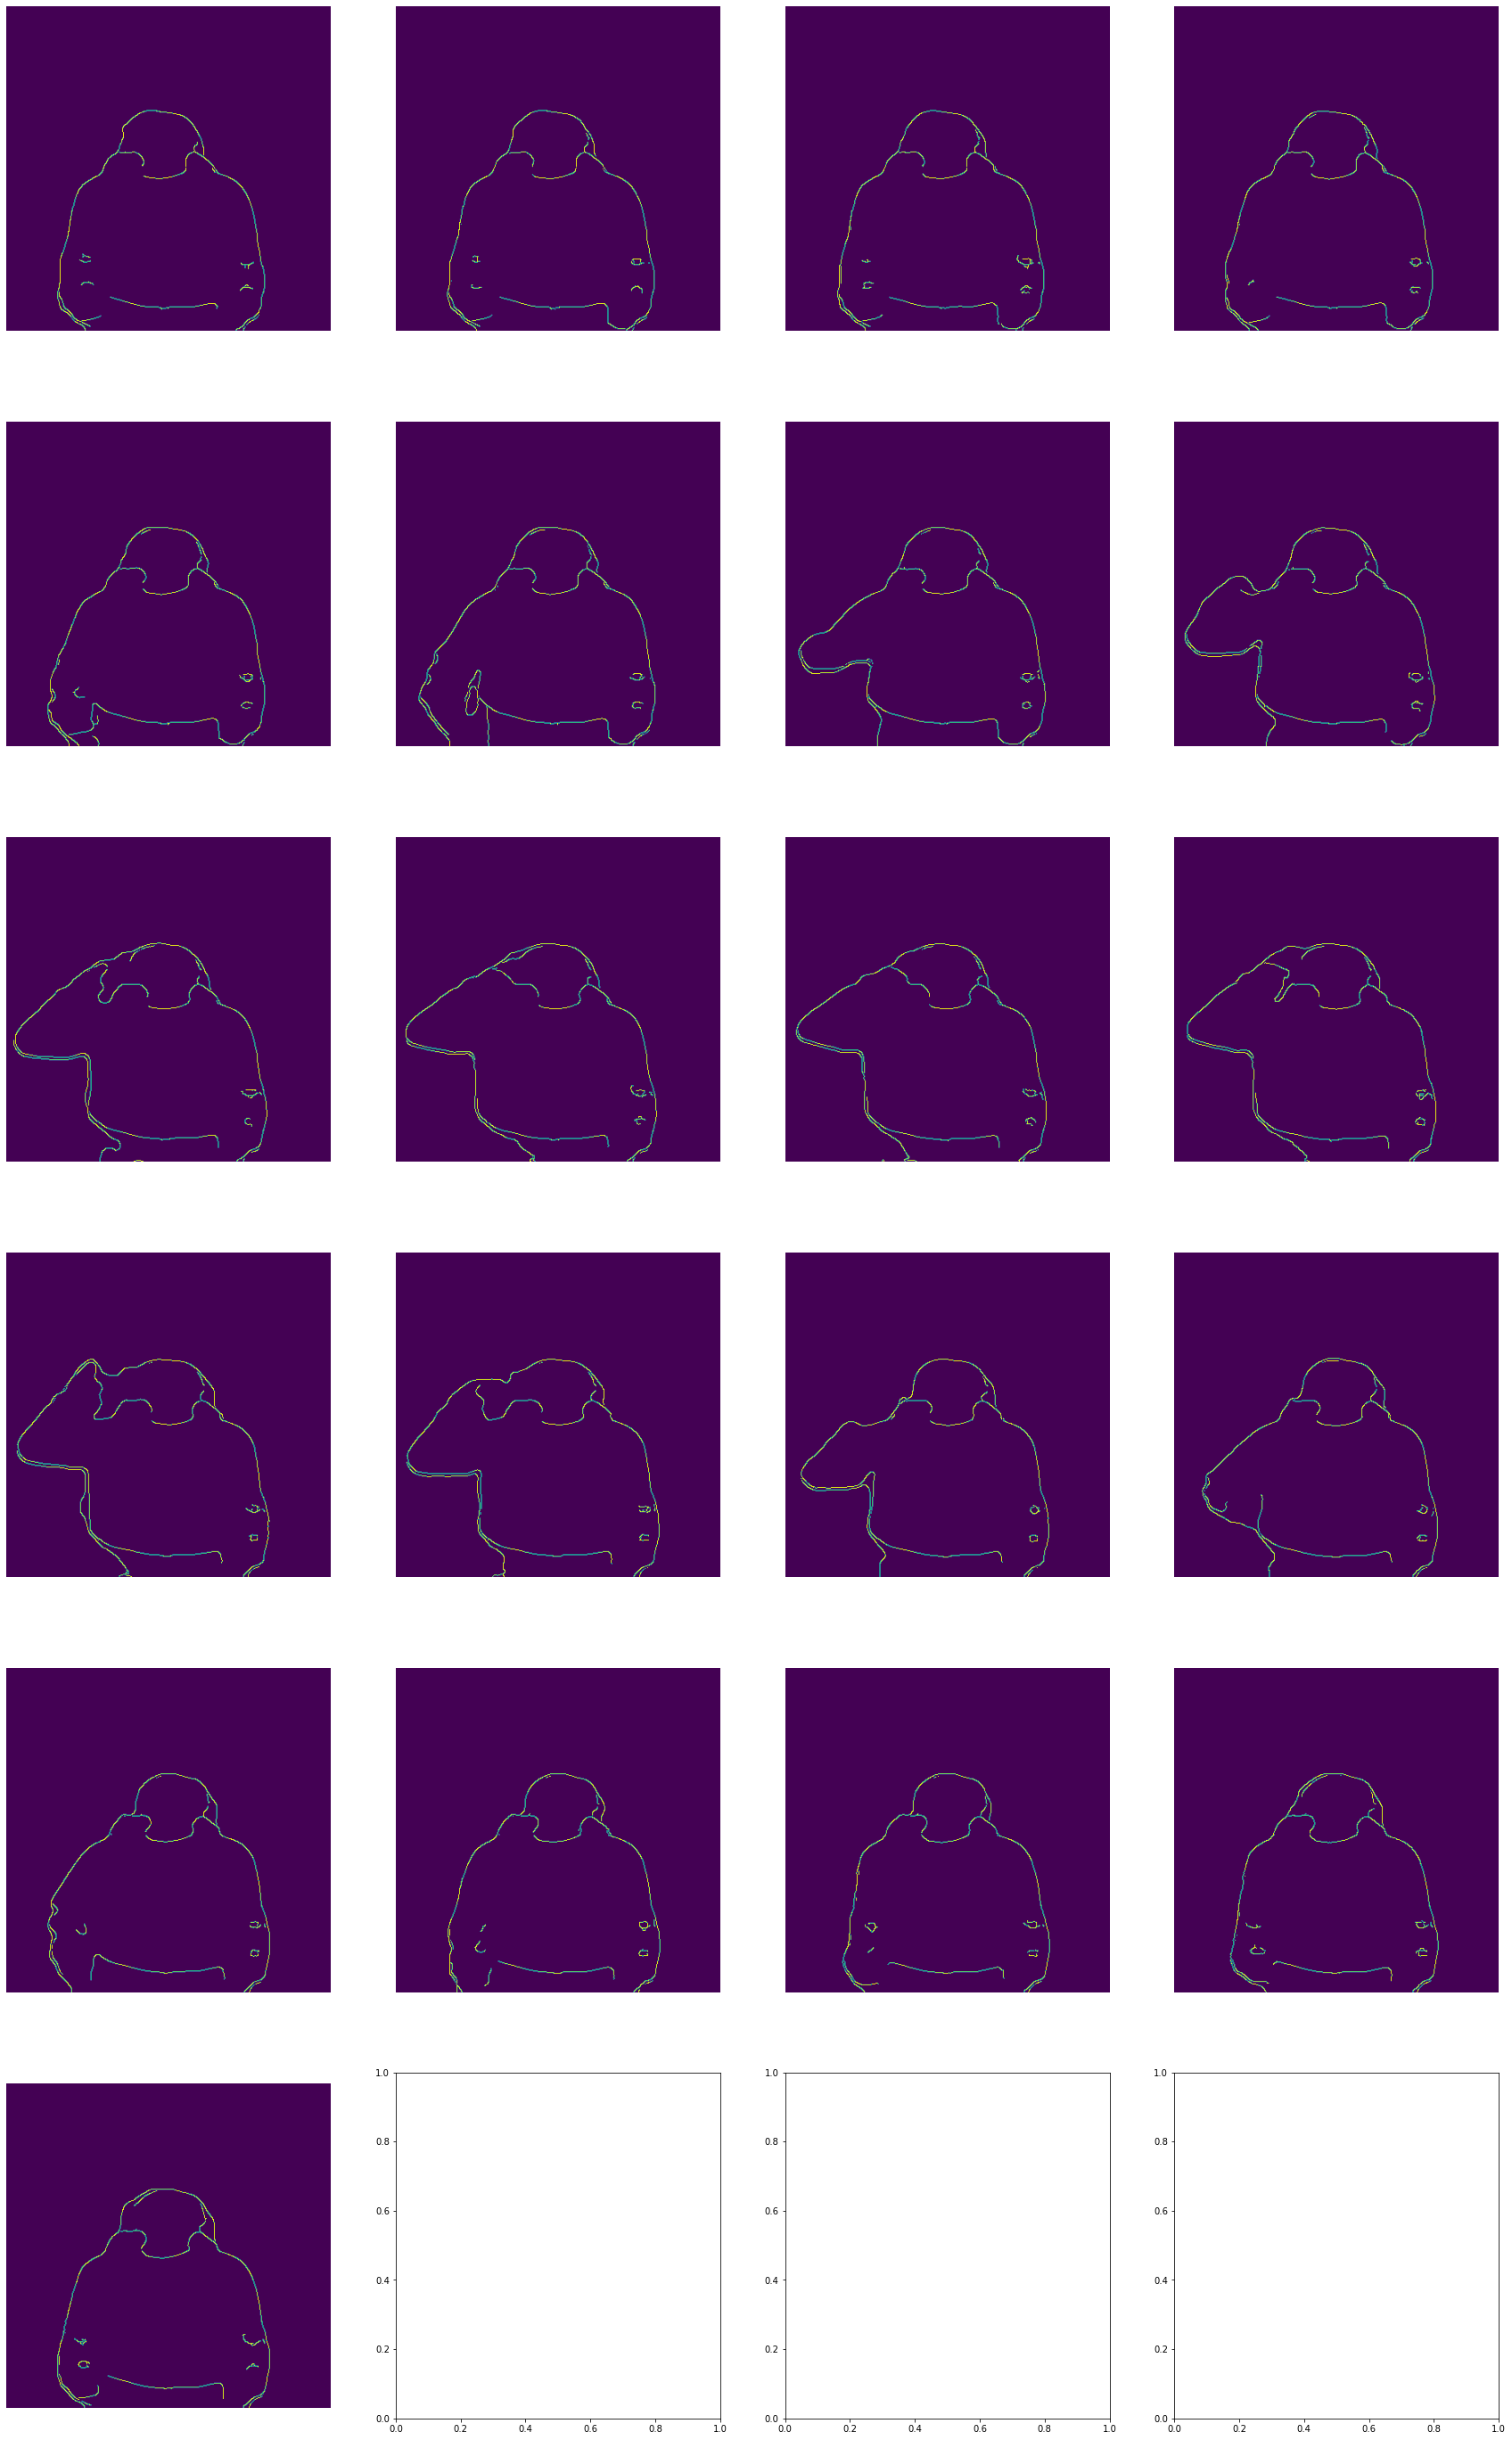

In [44]:
get_canny_video(grayscale_frames, apply_median_filter=True)

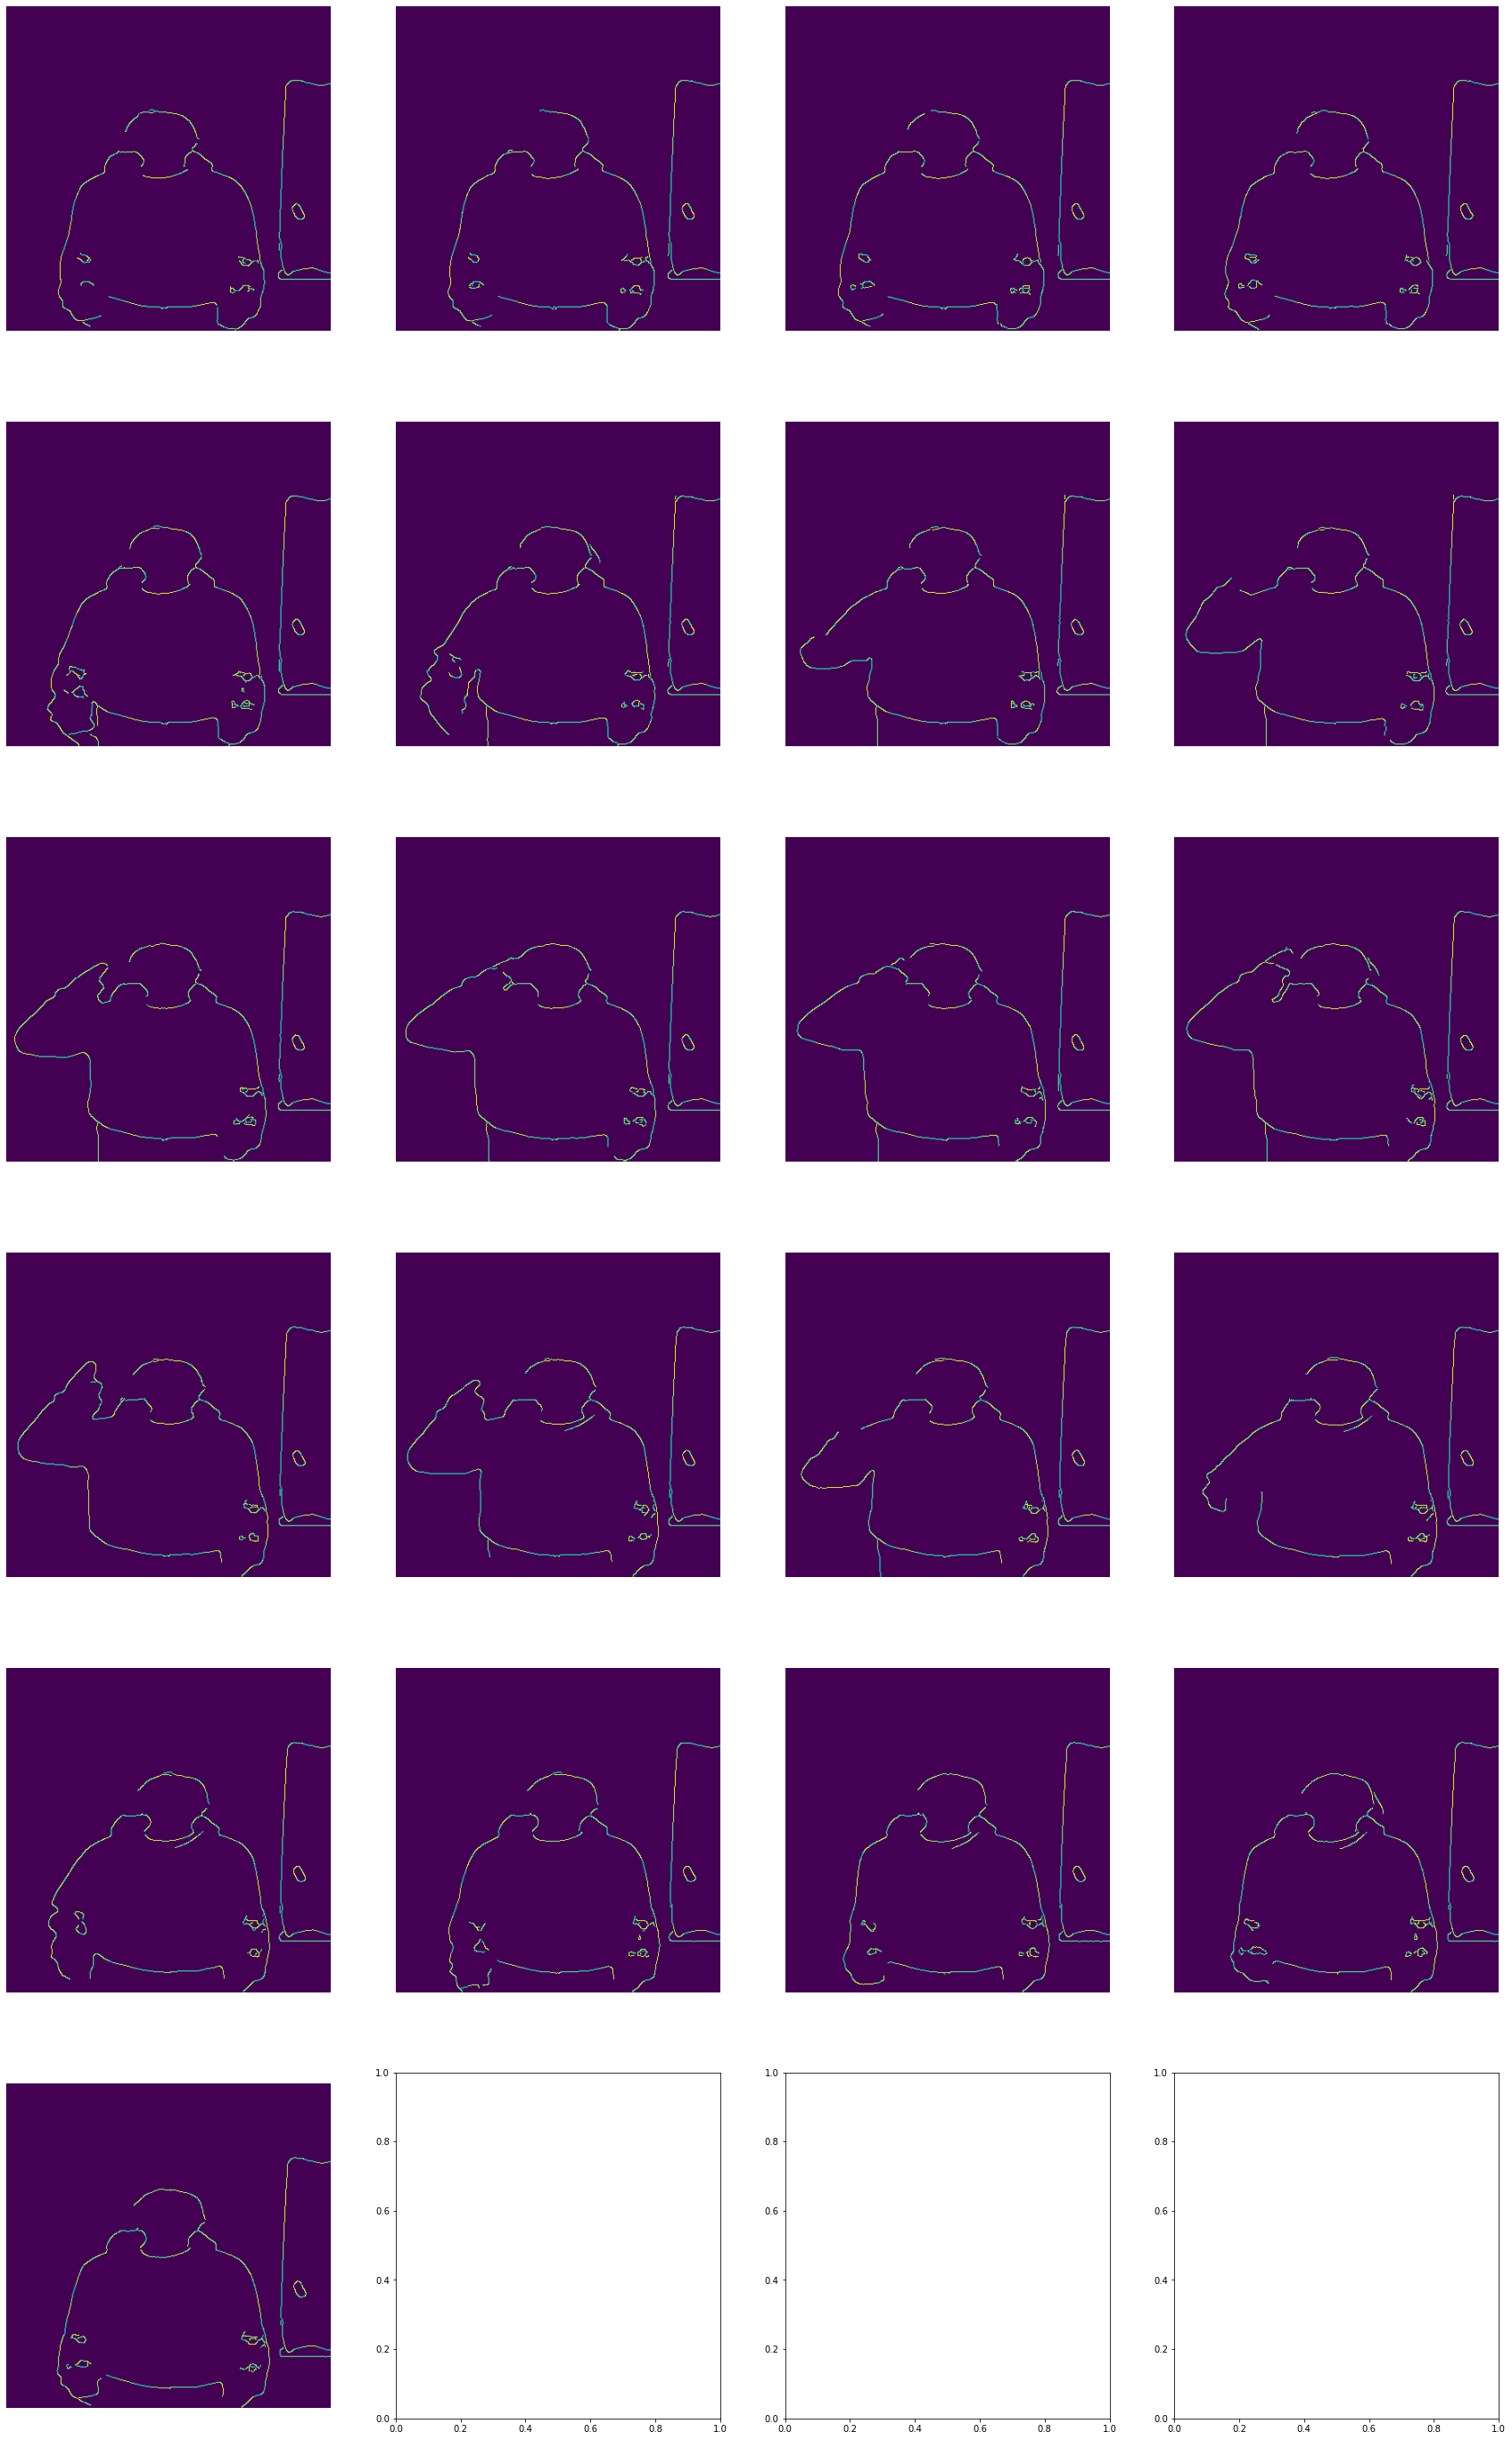

In [28]:
get_canny_video(grayscale_frames, apply_median_filter=True)

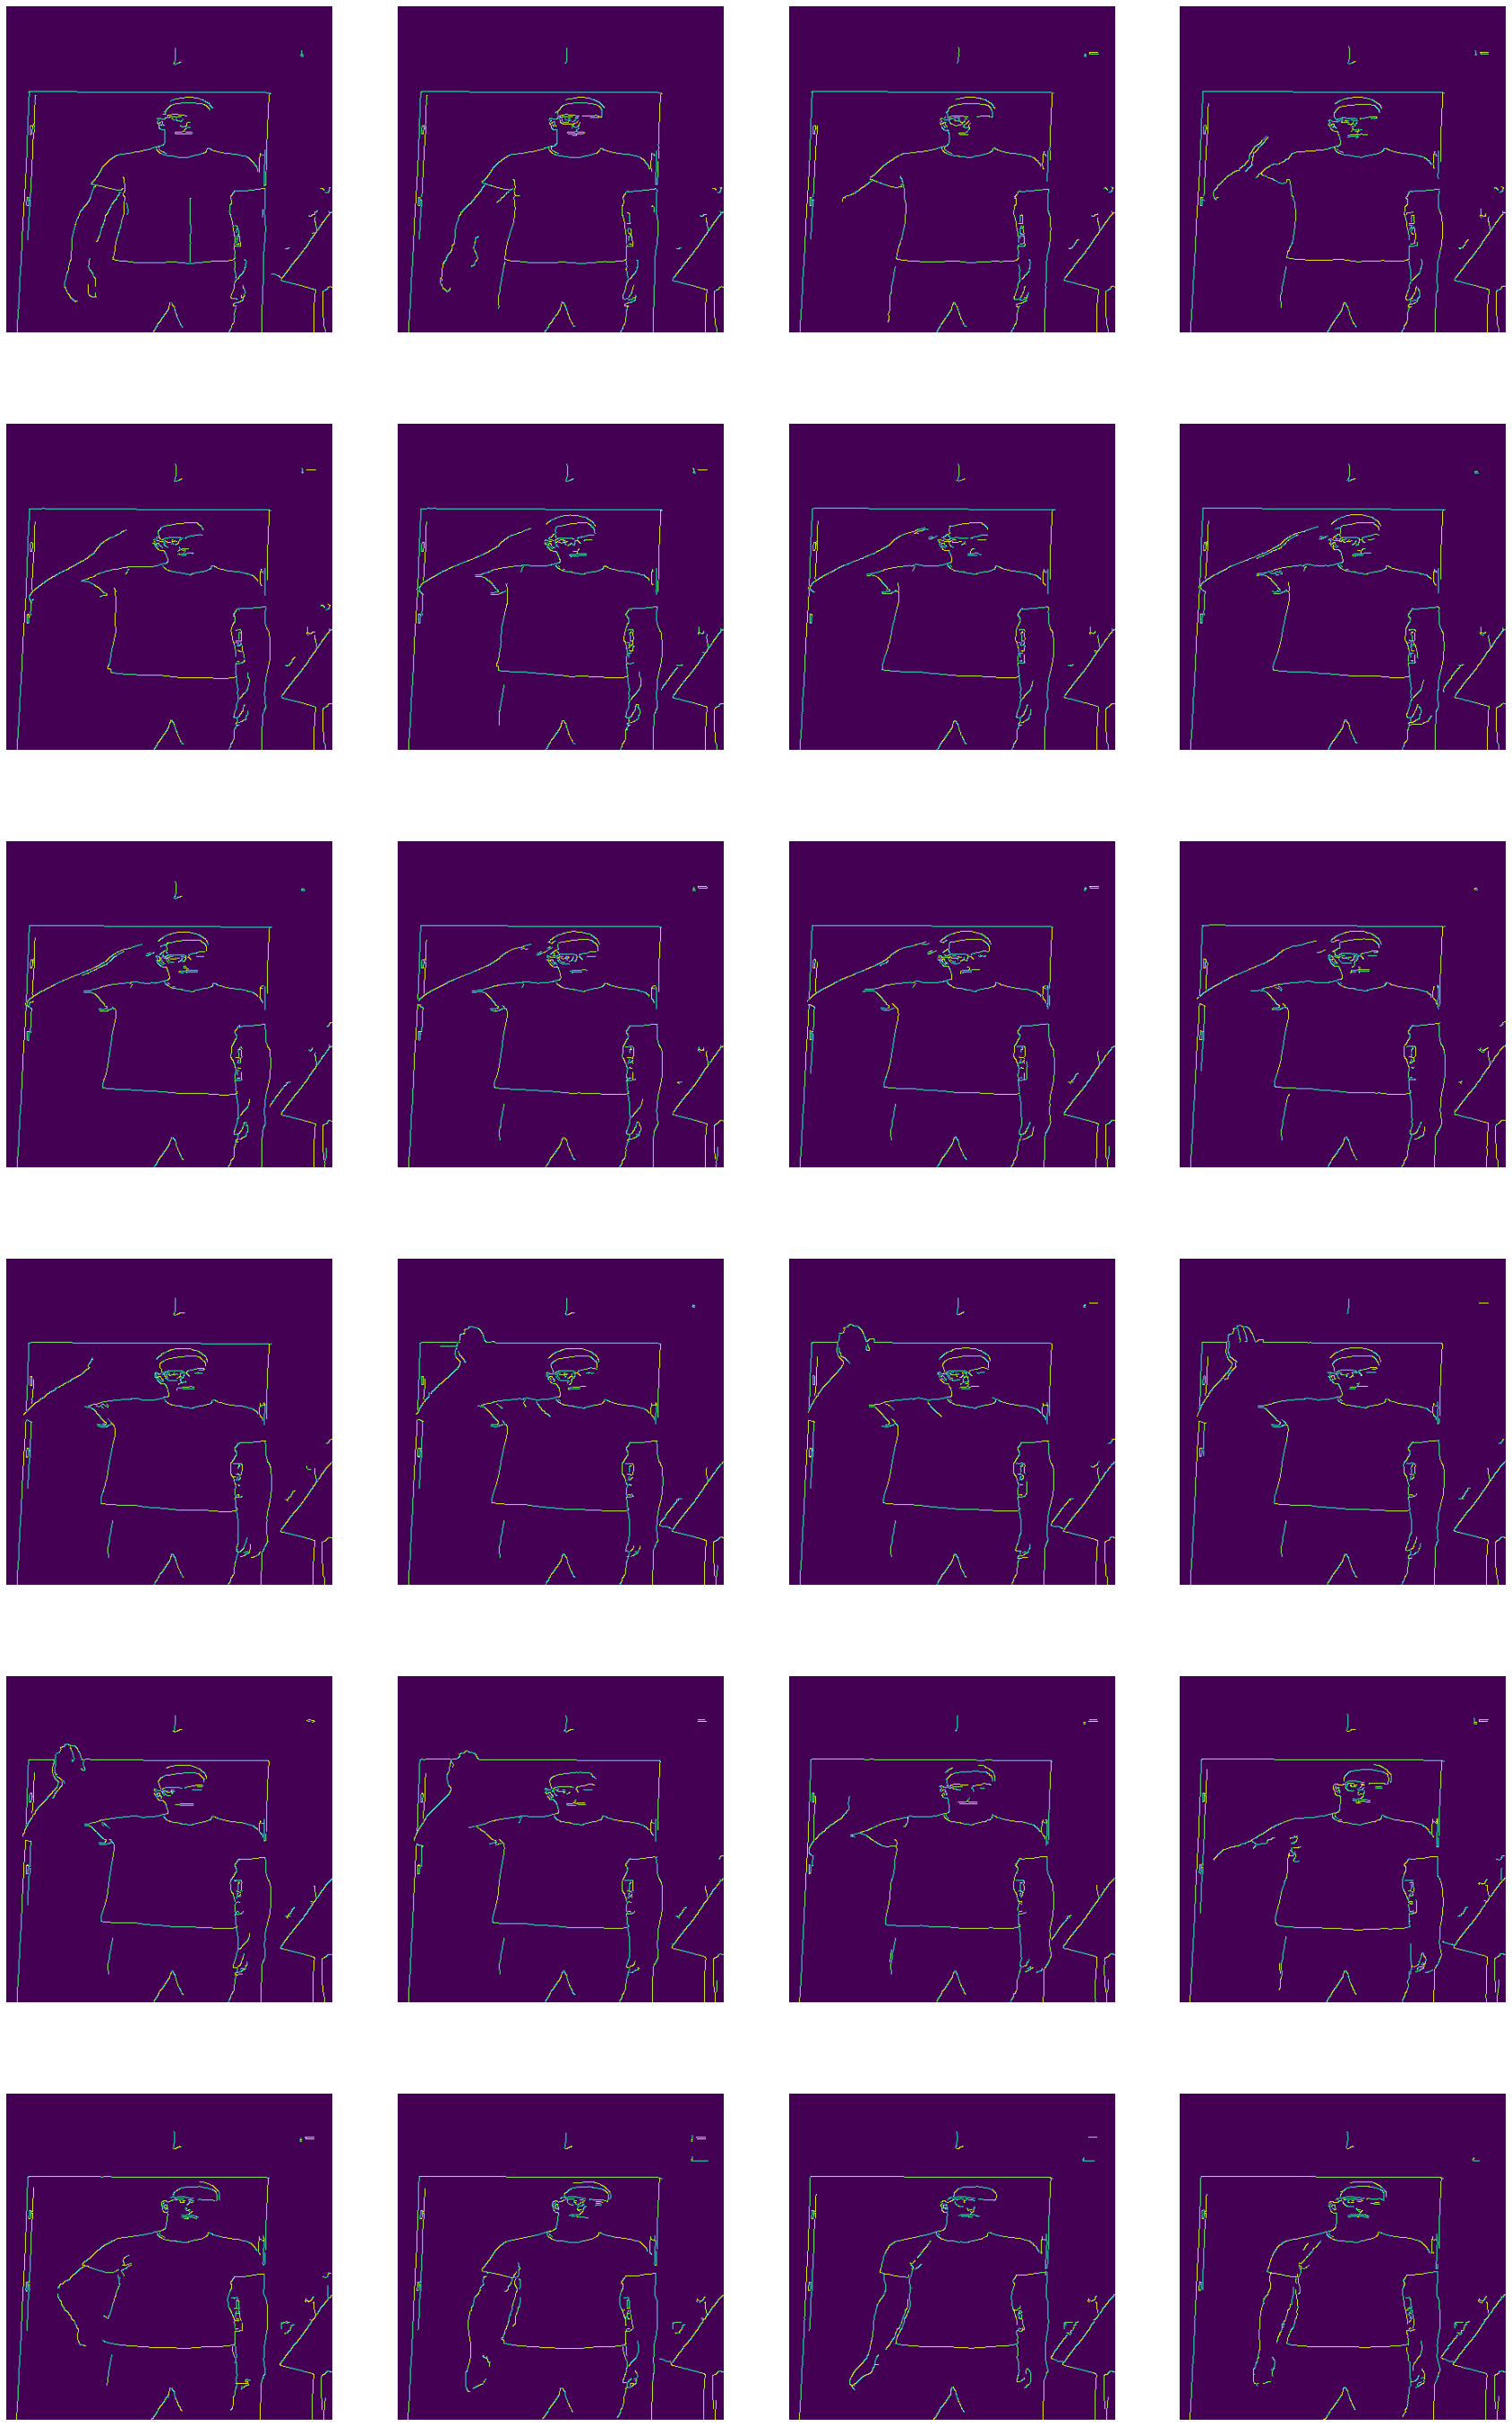

In [18]:
get_canny_video(grayscale_frames_2)

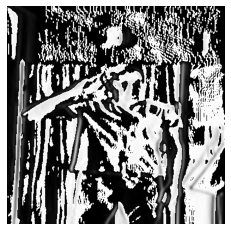

In [19]:
image = copy(grayscale_frames_2[8])
after_gauss = gaussian_filter(image, 2)
# after_median_filter = median_filter(after_gauss, 20)

plt.axis('off')
plt.imshow(sobel(after_gauss), 'gray')
plt.show()

### **After erosion**

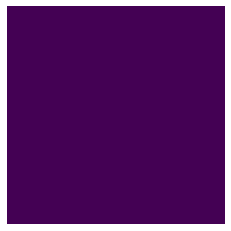

In [37]:
kernel = np.ones((3, 3), np.uint8) * 255
edges = cv2.Canny(grayscale_frames[8], 100, 200)
img_erosion = cv2.erode(edges, kernel, iterations=1)

plt.imshow(img_erosion)
plt.axis('off')
plt.show()

In [36]:
kernel2 = np.ones((3, 3), np.uint8) * 255
kernel2

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [35]:
print(*[row for row in edges], sep='\n')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 255   0 255   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [41]:
grayscale_frames_3 = get_frames(PATH_TO_FOLDER_WITH_VIDEOS, CHOSEN_VIDEO_2, SEQUENCE_LENGTH, grayscale=False)

In [43]:
grayscale_frames_4 = get_frames(PATH_TO_FOLDER_WITH_VIDEOS, CHOSEN_VIDEO, SEQUENCE_LENGTH, grayscale=False)

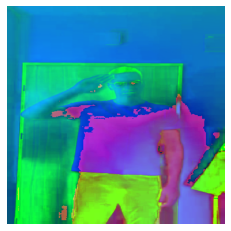

In [42]:
hsv = cv2.cvtColor(grayscale_frames_3[8], cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.axis('off')
plt.show()

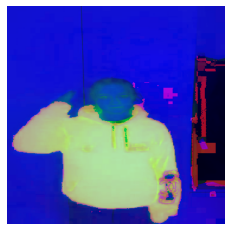

In [44]:
hsv2 = cv2.cvtColor(grayscale_frames_4[8], cv2.COLOR_BGR2HSV)
plt.imshow(hsv2)
plt.axis('off')
plt.show()